In [1]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
from astropy import units as u
import pymangle
try: 
    from Class10_notebook import *
    from Class11_notebook import *
except ModuleNotFoundError:
    import os
    import sys
    ASTRO_path = os.path.abspath(os.path.join(os.path.dirname('__file__'), "..")) #TJ this creates a path to all week files 
    sys.path.insert(0, ASTRO_path) #TJ adds the path to all weeks
    
    from Week5.Class10_notebook import *
    from Week6.Class11_notebook import *

In [2]:
#Python tasks 1 and 2: generate two polygons

cap1 = define_cap_bounded_by_ra(5) #TJ define the caps bounded by RA and dec
cap2 = define_cap_bounded_by_ra(6)
cap2 = (*cap2[:3], -cap2[3]) #TJ need to get the cap thats BELOW 6hrs so the overlap is from 5-6
cap3 = define_cap_bounded_by_dec(30)
cap4 = define_cap_bounded_by_dec(40)
cap4 = (*cap4[:3], -cap4[3]) #TJ need to get the cap thats BELOW 40 declination so the overlap is from 30-40

polygon1 = [cap1, cap2, cap3, cap4]
RA1_1, RA2_1 = 5*15*np.pi/180, 6*15*np.pi/180 #TJ define both RA's in radians for calculating area of region
ster1 = (RA2_1- RA1_1)*(np.sin(40 * u.deg) - np.sin(30 * u.deg)) #TJ uses definition given in Class notes 12: steradians = (α2radians - α1radians)(sinδ2 - sinδ1)

cap5 = define_cap_bounded_by_ra(11) #TJ define the caps bounded by RA and dec
cap6 = define_cap_bounded_by_ra(12)
cap6 = (*cap6[:3], -cap6[3]) #TJ same as above
cap7 = define_cap_bounded_by_dec(60)
cap8 = define_cap_bounded_by_dec(70)
cap8 = (*cap8[:3], -cap8[3]) #TJ same as above
RA1_2, RA2_2 = 11*15*np.pi/180, 12*15*np.pi/180 #TJ define both RA's in radians for calculating area of region
ster2 = (RA2_2 - RA1_2)*(np.sin(70 * u.deg) - np.sin(60 * u.deg)) #TJ uses definition given in Class notes 12: steradians = (α2radians - α1radians)(sinδ2 - sinδ1)
ster = [ster1, ster2] #TJ make the steradian list
polygon2 = [cap5, cap6, cap7, cap8]

make_mangle_file("Class12_regions", [polygon1, polygon2], steradians = ster) #TJ make the .ply file
mask = pymangle.Mangle('Class12_regions.ply') #TJ make the mask from the .ply file


CPU times: user 383 ms, sys: 9.92 ms, total: 393 ms
Wall time: 394 ms


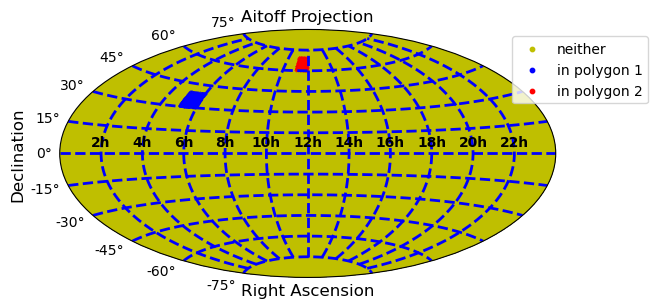

In [16]:
%%time
#Python task 3 and 4: populate sphere with points and highlight the ones in the masks
ra = 360.*(random(1000000)) #TJ generate 1 million right ascensions
dec = (180/np.pi)*np.arcsin(1.-random(1000000)*2.) #TJ generate 1 million declinations
p_ids = mask.polyid(ra, dec) #TJ get id which represents which polygon it is in
fig = plt.figure()
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter((ra[p_ids==-1]-180)*np.pi/180, dec[p_ids==-1]*np.pi/180, s=0.01, label = "", color = 'y') #TJ polyid of -1 means not in any polygon
ax.scatter([],[], s=10, label = "neither", color = 'y') #TJ make another plot so legend marker is big
ax.scatter((ra[p_ids==2]-180)*np.pi/180, dec[p_ids==2]*np.pi/180, s=0.01, label = "", color = 'red') #TJ polyid of 2 is the second polygon
ax.scatter([],[], s=10, label = "in polygon 1", color = 'blue') #TJ make another plot so legend marker is big
ax.scatter((ra[p_ids==1]-180)*np.pi/180, dec[p_ids==1]*np.pi/180, s=0.01, label = "", color = 'blue') #TJ polyid of 1 is the first polygon
ax.scatter([],[], s=10, label = "in polygon 2", color = 'red') #TJ make another plot so legend marker is big
xlab = ['2h', '4h', '6h', '8h', '10h', '12h', '14h', '16h', '18h', '20h', '22h']
ax.set_xticklabels(xlab, weight=600)
ax.grid(color='blue', linestyle='--', linewidth=2)
ax.set_xlabel("Right Ascension", fontsize=12)
ax.set_ylabel("Declination", fontsize=12)
ax.set_title("Aitoff Projection", fontsize=12)
ax.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1))

CPU times: user 805 ms, sys: 2.53 ms, total: 808 ms
Wall time: 806 ms


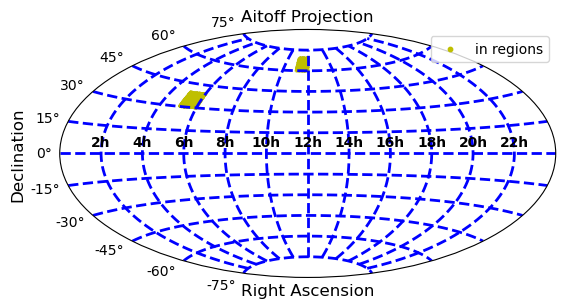

In [8]:
%%time
#python task #5 try using genrand()
ra_test, dec_test = mask.genrand(10000) #TJ generate 10,000 points within the mask
fig = plt.figure()
ax = fig.add_subplot(111, projection="aitoff")
ax.scatter((ra_test-180)*np.pi/180, dec_test*np.pi/180, s=0.01, label = "", color = 'y') 
ax.scatter([],[], s=10, label = "in regions", color = 'y') #TJ make another plot so legend marker is big
xlab = ['2h', '4h', '6h', '8h', '10h', '12h', '14h', '16h', '18h', '20h', '22h']
ax.set_xticklabels(xlab, weight=600)
ax.grid(color='blue', linestyle='--', linewidth=2)
ax.set_xlabel("Right Ascension", fontsize=12)
ax.set_ylabel("Declination", fontsize=12)
ax.set_title("Aitoff Projection", fontsize=12)
ax.legend(loc = 'upper right')

In [5]:
print("this seems to imply that generating a million points, and finding which ones are in the regions is faster than just generating 10,000 points \nthat are in the region... That feels ")

this seems to imply that generating a million points, and finding which ones are in the regions is faster than just generating 10,000 points 
that are in the region... That feels 
